### PROBLEM STATEMENT
**Exploratory Data Analysis** on dataset of **Customer Churn** to reveal patterns behind those data and build Machine Learning model to predict the class variable, which is whether the customer is churned or not.
### Stages of EDA
1. Descriptive Analysis
2. Correlation Analysis
3. Check imbalance in data
4. Data Visualization
### Importing Required Python libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [94]:
data = pd.read_csv('Data/customer_churn_dataset-training-master.csv')

### Summarize Data

In [95]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [96]:
data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [97]:
print ('Shape of the given dataset is {}.Contains {} rows and {} columns '.format(data.shape,data.shape[0],data.shape[1]))

Shape of the given dataset is (440833, 12).Contains 440833 rows and 12 columns 


### Feature Names and its Datatypes

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


### Checking for Missing Values

In [99]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [100]:
data = data.dropna()
data.shape

(440832, 12)

### Counting for Unique Values

In [101]:
data.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

It seems like there is a row of nulls in the Dataset so, we have to drop it

### Data Spliting
Select and separately store Numerical and Categorical features in different variables.

In [102]:
numerical_data = data.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 9 numerical features: 

['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']


In [103]:
categorical_data=data.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 3 categorical features: 

['Gender', 'Subscription Type', 'Contract Length']


### Descriptive Analysis
In descriptive Analysis we analysis each variable separately to get inference about the feature.

### Summary Statistics of Numerical Features

In [104]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


### Summary Statistics of Categorical Features

In [105]:
categorical_data.describe(include='object').T

,count,unique,top,freq
Gender,440832,2,Male,250252
Subscription Type,440832,3,Standard,149128
Contract Length,440832,3,Annual,177198


### Histograms & Bar Plots for Numeric Data

Histogram & Box plot for CustomerID


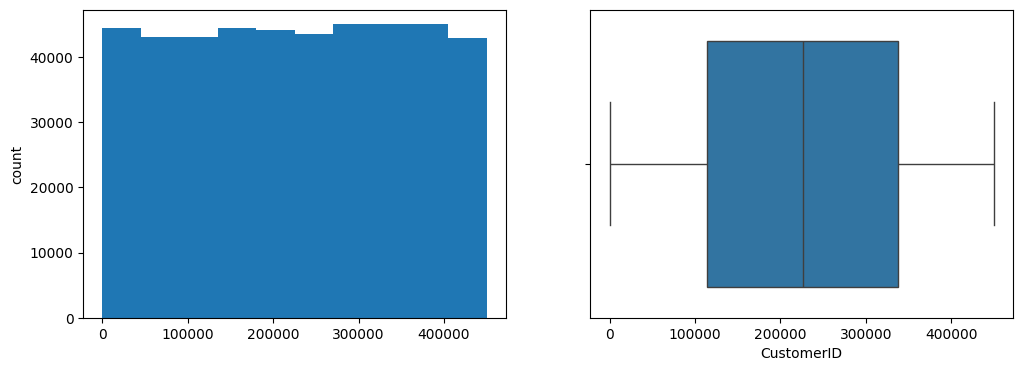

Histogram & Box plot for Age


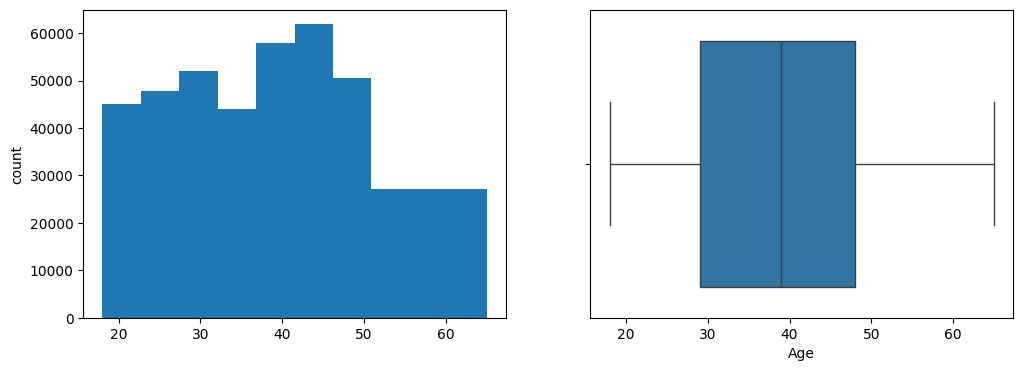

Histogram & Box plot for Tenure


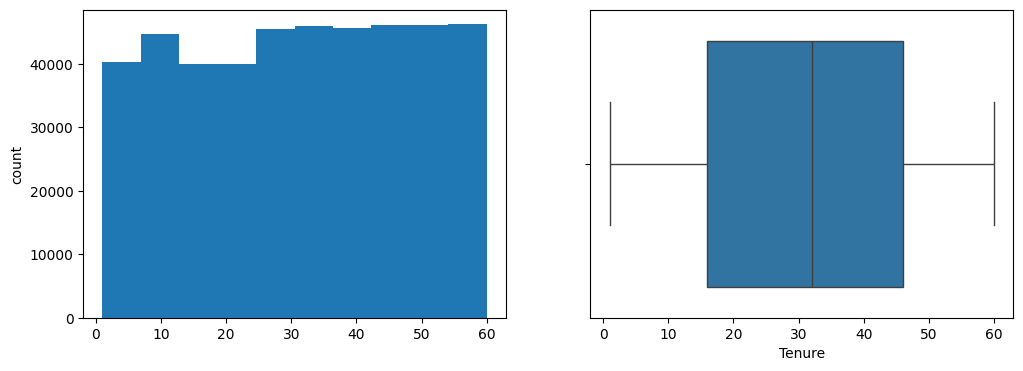

Histogram & Box plot for Usage Frequency


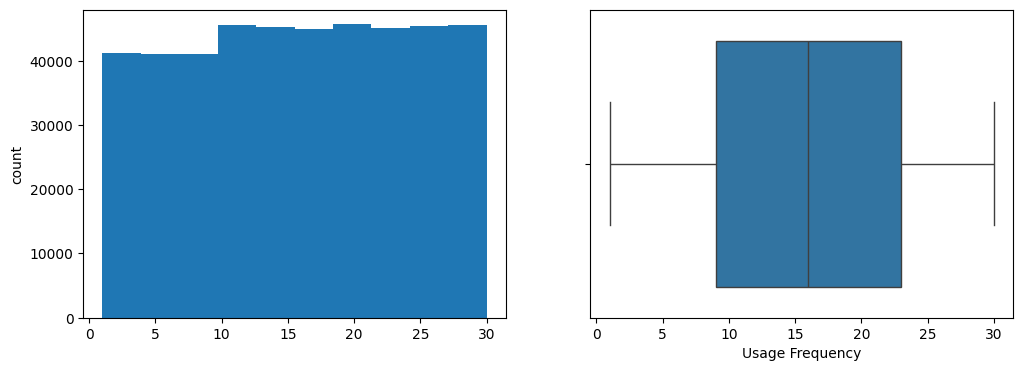

Histogram & Box plot for Support Calls


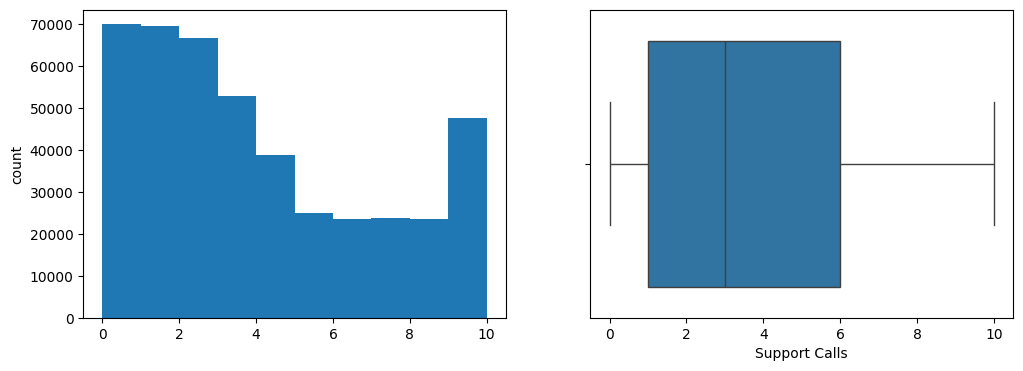

Histogram & Box plot for Payment Delay


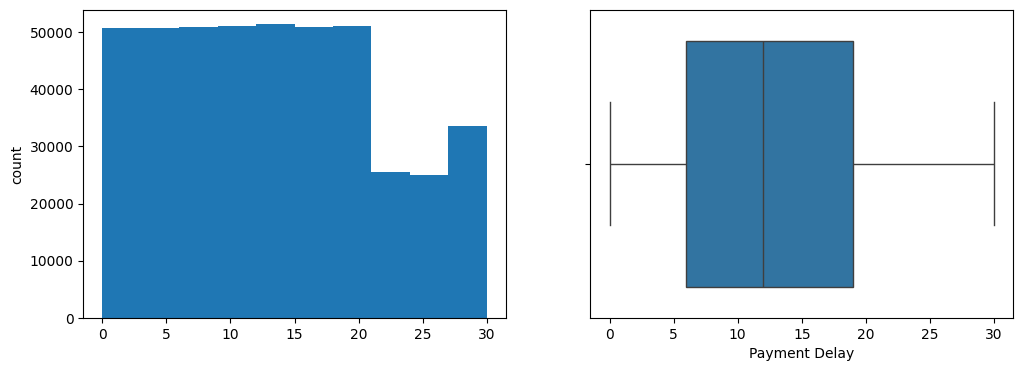

Histogram & Box plot for Total Spend


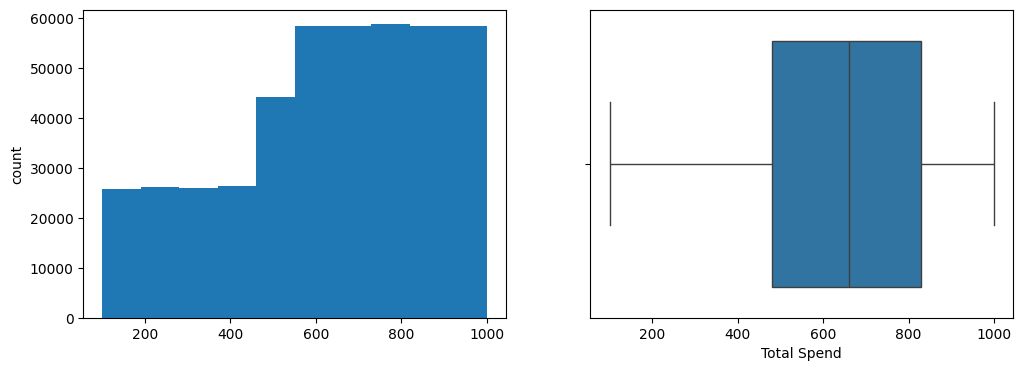

Histogram & Box plot for Last Interaction


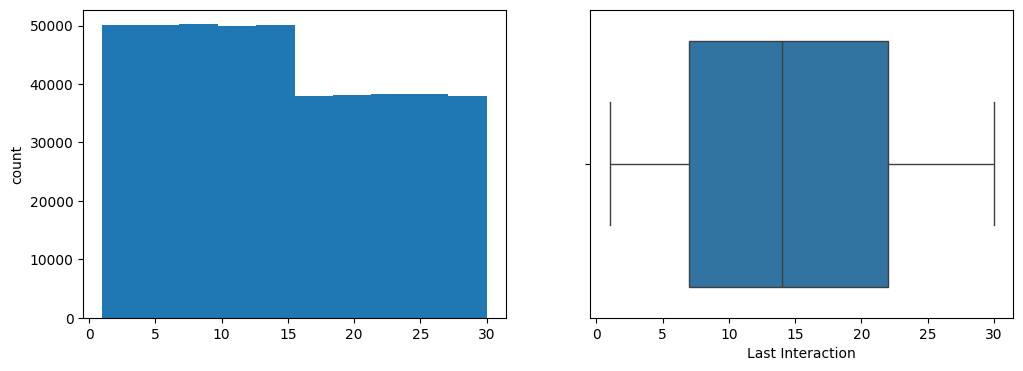

Histogram & Box plot for Churn


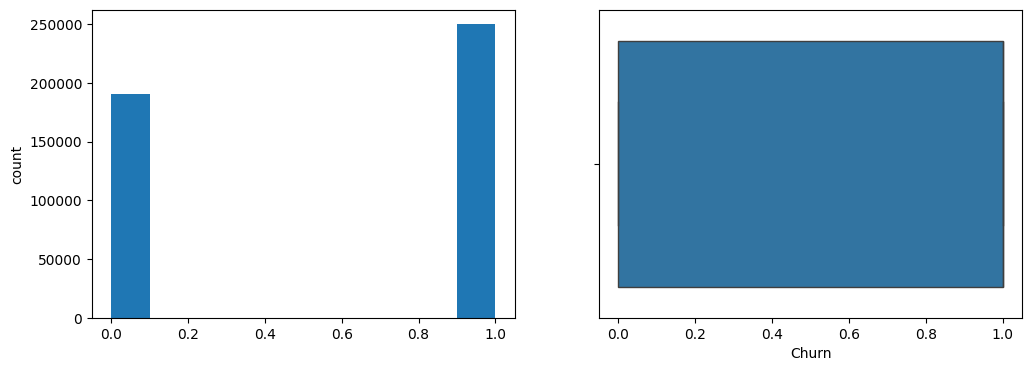

In [106]:
for col in numerical_features:
    print(f"Histogram & Box plot for {col}")
    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

### Count Plot for Categorical Data

Count Plot for Gender


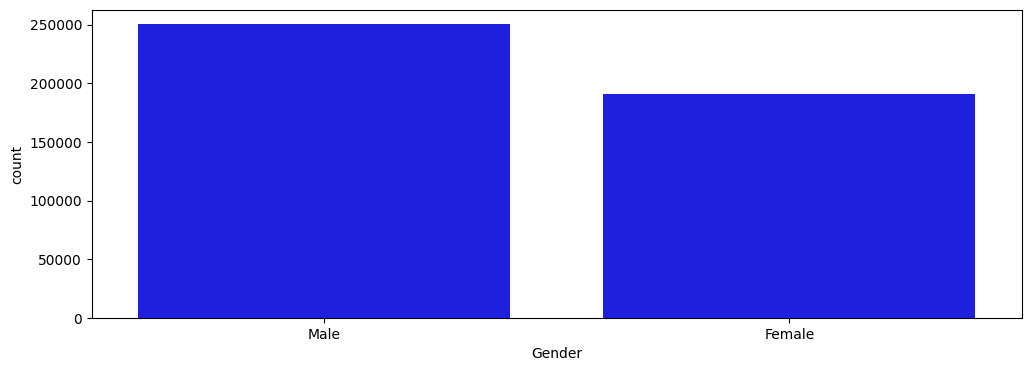

Count Plot for Subscription Type


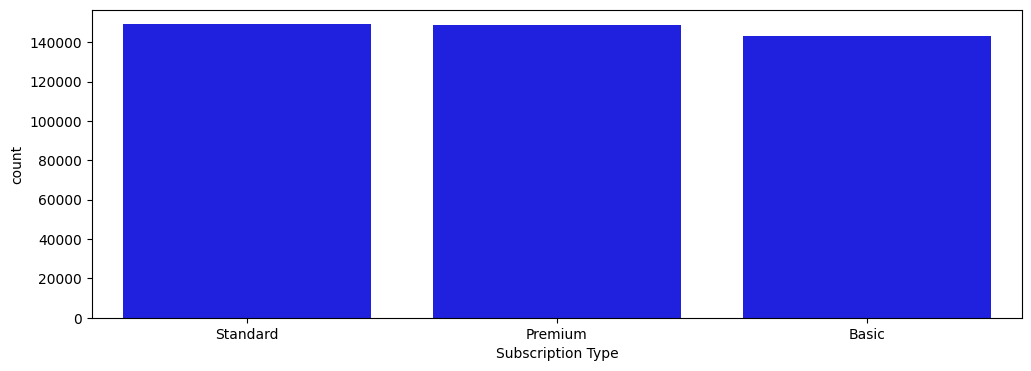

Count Plot for Contract Length


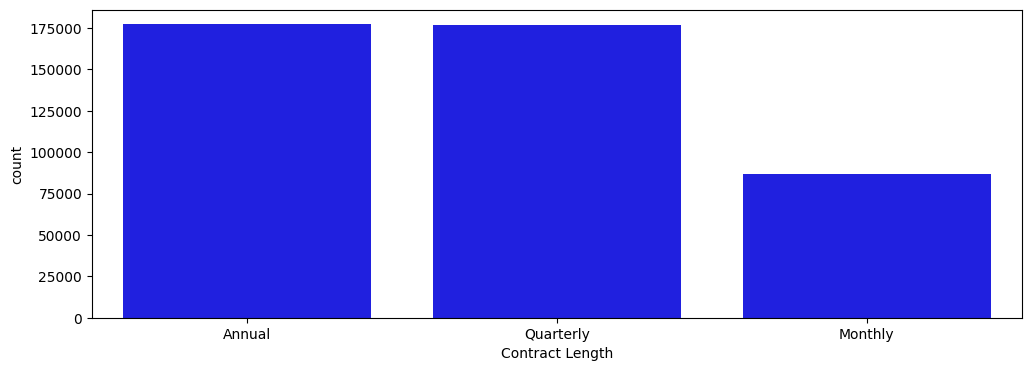

In [107]:
for col in categorical_features:
    print(f"Count Plot for {col}")
    plt.figure(figsize = (12, 4))
    sns.countplot(x = col, data = data, color = 'blue', order = data[col].value_counts().index)
    plt.ylabel('count')
    plt.show()

### Correlation Analysis
Correlation Matrix of whole dataset

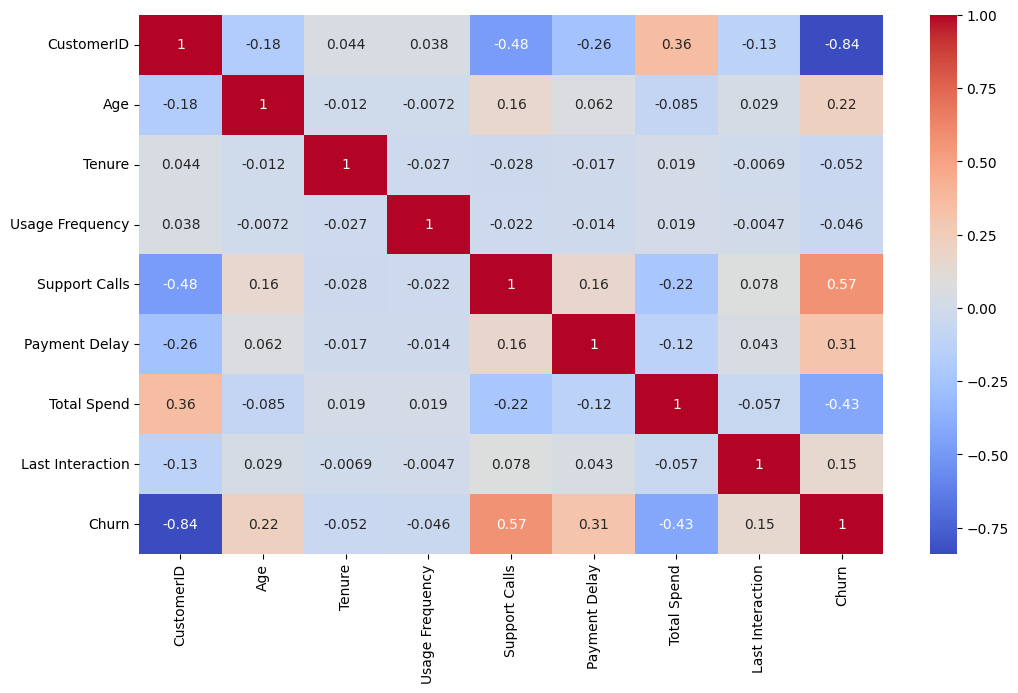

In [108]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(numeric_only=True), annot = True, cmap='coolwarm')
plt.show()

### Check Imbalance in Data

Class Counts:
Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

Class Percentages:
Churn
1.0    56.71
0.0    43.29
Name: count, dtype: float64%


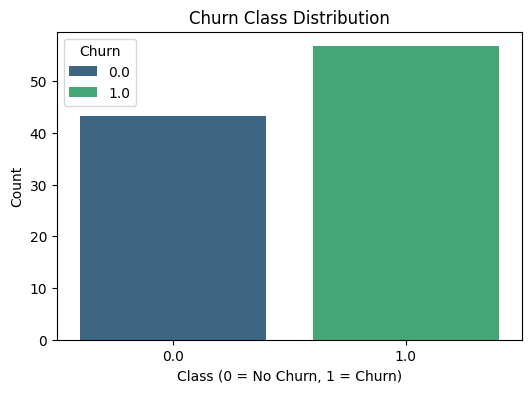

In [109]:
# Count occurrences of each class
class_counts = numerical_data["Churn"].value_counts()
total_samples = len(numerical_data)

# Calculate percentage
class_percentages = (class_counts / total_samples) * 100

# Print results
print(f"Class Counts:\n{class_counts}")
print(f"\nClass Percentages:\n{class_percentages.round(2)}%")

# Plot bar chart for class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_percentages, palette="viridis", hue=class_counts.index)
plt.title("Churn Class Distribution")
plt.xlabel("Class (0 = No Churn, 1 = Churn)")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()


### Data Visualization with Dimentionality Reduction

1D Visualization using LDA

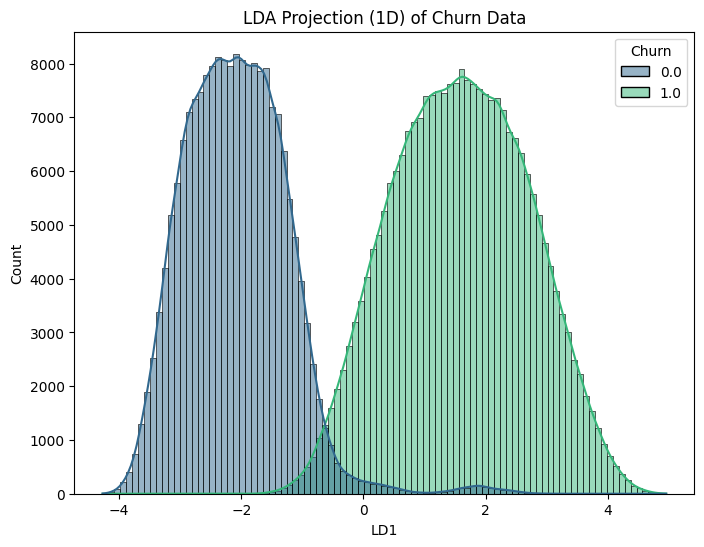

In [110]:
# Apply LDA (only 1 component since Churn has 2 classes)
lda = LDA()
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data.drop(columns=["Churn"]))
data_1D = lda.fit_transform(numerical_data_scaled, numerical_data["Churn"])

# Convert to DataFrame and include 'Churn'
lda_df = pd.DataFrame(data_1D, columns=["LD1"])
lda_df["Churn"] = numerical_data["Churn"]  # Add Churn back for coloring

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=lda_df, x="LD1", hue="Churn", kde=True, palette="viridis")
plt.title("LDA Projection (1D) of Churn Data")
plt.show()

2D Visualization using PCA

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


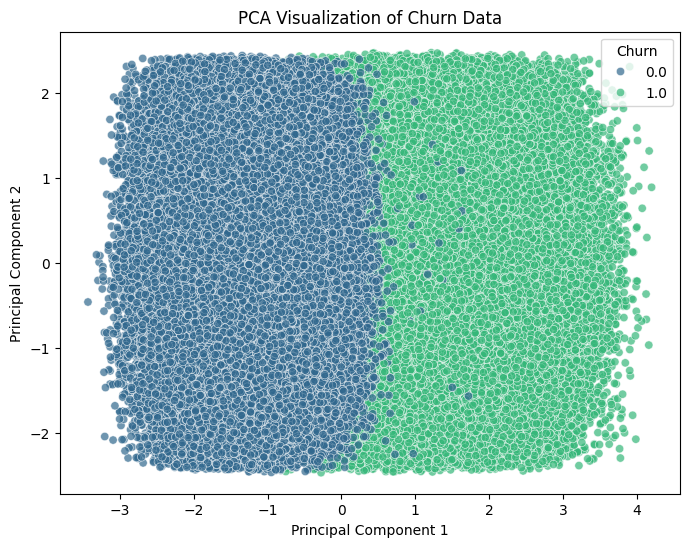

In [111]:
X = numerical_data.drop(columns=["Churn"])  # Features
y = numerical_data["Churn"]  # Target

# Standardizing the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Churn"] = y

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Churn", palette="viridis", alpha=0.7)
plt.title("PCA Visualization of Churn Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Churn")
plt.show()